In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_churn_data.csv")

In [3]:
len(df)+1  # data rows + header

1001

In [4]:
df.head(10)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes
6,7,60,Male,14,80.32,One-Year,NaN,1124.48,No,Yes
7,8,52,Female,6,58.90,One-Year,NaN,353.40,No,Yes
8,9,40,Female,53,49.81,Two-Year,Fiber Optic,2639.93,Yes,No
9,10,50,Female,10,61.55,Month-to-Month,Fiber Optic,615.50,Yes,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [6]:
df.isna().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
MonthlyCharges,0
ContractType,0
InternetService,297
TotalCharges,0
TechSupport,0
Churn,0


In [7]:
df["InternetService"] = df["InternetService"].fillna("No Internet")

In [8]:
df.isna().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
MonthlyCharges,0
ContractType,0
InternetService,0
TotalCharges,0
TechSupport,0
Churn,0


In [9]:
df.head(10)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,No Internet,2208.32,No,Yes
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes
6,7,60,Male,14,80.32,One-Year,No Internet,1124.48,No,Yes
7,8,52,Female,6,58.90,One-Year,No Internet,353.40,No,Yes
8,9,40,Female,53,49.81,Two-Year,Fiber Optic,2639.93,Yes,No
9,10,50,Female,10,61.55,Month-to-Month,Fiber Optic,615.50,Yes,Yes


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [12]:
numeric_data = df.select_dtypes(include=["number"])

In [13]:
numeric_data

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
0,1,49,4,88.35,353.40
1,2,43,0,36.67,0.00
2,3,51,2,63.79,127.58
3,4,60,8,102.34,818.72
4,5,42,32,69.01,2208.32
...,...,...,...,...,...
995,996,42,41,37.14,1522.74
996,997,62,9,80.93,728.37
997,998,51,15,111.72,1675.80
998,999,39,68,65.67,4465.56


In [14]:
numeric_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [15]:
df['Churn'].value_counts()

,count
Churn,
Yes,883
No,117


In [16]:
import matplotlib.pyplot as plt

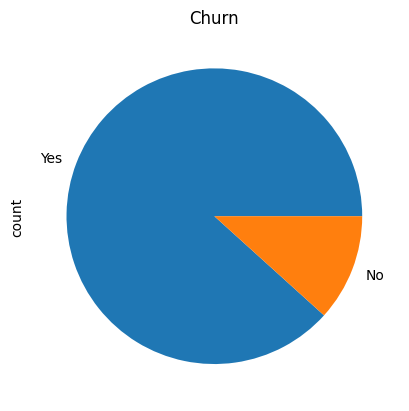

In [17]:
df['Churn'].value_counts().plot(kind='pie')
plt.title("Churn")
plt.show()

In [18]:
df.groupby("Churn")["MonthlyCharges"].mean()

,MonthlyCharges
Churn,
No,62.54641
Yes,75.96077


In [19]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [20]:
df.groupby("Churn")["Tenure"].mean()

,Tenure
Churn,
No,30.264957
Yes,17.476784


In [21]:
df.groupby("Churn")["Age"].mean()

,Age
Churn,
No,43.487179
Yes,44.831257


In [22]:
df.groupby("ContractType")["MonthlyCharges"].mean()

,MonthlyCharges
ContractType,
Month-to-Month,75.909198
One-Year,73.822803
Two-Year,71.334500


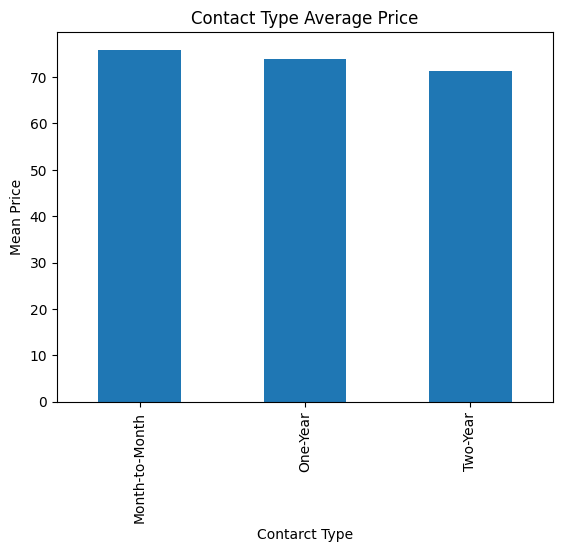

In [23]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean Price")
plt.xlabel("Contarct Type")
plt.title("Contact Type Average Price")
plt.show()

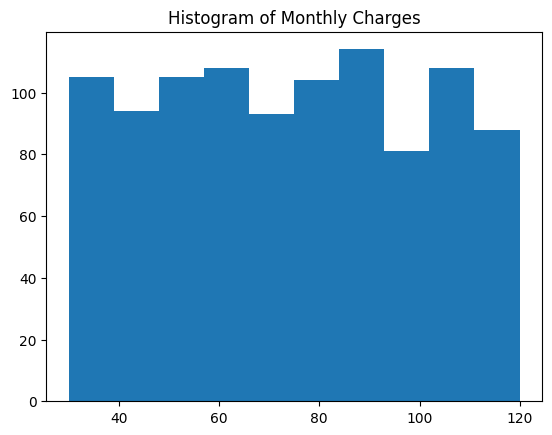

In [24]:
plt.hist(df['MonthlyCharges'])
plt.title("Histogram of Monthly Charges")
plt.show()

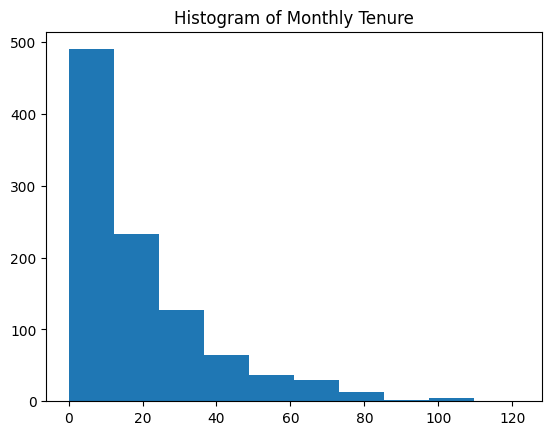

In [25]:
plt.hist(df['Tenure'])
plt.title("Histogram of Monthly Tenure")
plt.show()

In [26]:
# 1 = male, 0 = female

df['Gender'] = (df['Gender'] == 'Male').astype(int)

In [27]:
# Encoding of Churn Column
# 1 = yes, 0 = no

df['Churn'] = (df['Churn'] == 'Yes').astype(int)

In [28]:
# Encoding of TechSupport Column
# 1 = yes, 0 = no

df['TechSupport'] = (df['TechSupport'] == 'Yes').astype(int)

In [29]:
df.loc[df['ContractType'] == 'Month-to-Month', 'ContractType'] = 0
df.loc[df['ContractType'] == 'One-Year', 'ContractType'] = 1
df.loc[df['ContractType'] == 'Two-Year', 'ContractType'] = 2

In [30]:
df.loc[df['InternetService'] == 'Fiber Optic', 'InternetService'] = 0
df.loc[df['InternetService'] == 'DSL', 'InternetService'] = 1
df.loc[df['InternetService'] == 'No Internet', 'InternetService'] = 2

In [31]:
df.head(10)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,1,4,88.35,0,0,353.40,1,1
1,2,43,1,0,36.67,0,0,0.00,1,1
2,3,51,0,2,63.79,0,0,127.58,0,1
3,4,60,0,8,102.34,1,1,818.72,1,1
4,5,42,1,32,69.01,0,2,2208.32,0,1
5,6,42,0,16,119.75,2,1,1916.00,1,1
6,7,60,1,14,80.32,1,2,1124.48,0,1
7,8,52,0,6,58.90,1,2,353.40,0,1
8,9,40,0,53,49.81,2,0,2639.93,1,0
9,10,50,0,10,61.55,0,0,615.50,1,1


In [32]:
x = df.drop("Churn",axis=1)
y = df["Churn"]

In [33]:
x

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport
0,1,49,1,4,88.35,0,0,353.40,1
1,2,43,1,0,36.67,0,0,0.00,1
2,3,51,0,2,63.79,0,0,127.58,0
3,4,60,0,8,102.34,1,1,818.72,1
4,5,42,1,32,69.01,0,2,2208.32,0
...,...,...,...,...,...,...,...,...,...
995,996,42,1,41,37.14,0,0,1522.74,1
996,997,62,1,9,80.93,0,2,728.37,0
997,998,51,0,15,111.72,0,0,1675.80,1
998,999,39,1,68,65.67,1,2,4465.56,0


In [34]:
y

,Churn
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


In [35]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
log_model = LogisticRegression()

In [38]:
log_model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_pred = log_model.predict(x_test)

In [40]:
accuracy_score(y_test,y_pred)

0.93

In [41]:
import joblib

In [42]:
# Save the trained model
joblib.dump(log_model, "Churn_Prediction_Model.pkl")

['Churn_Prediction_Model.pkl']

In [43]:
sample = pd.DataFrame({
    "CustomerID": [879],
    "Age": [25],
    "Gender": [0],
    "Tenure": [20],
    "MonthlyCharges": [70.5],
    "ContractType": [1],
    "InternetService": [2],
    "TotalCharges": [1256.75],
    "TechSupport": [0]
})

In [44]:
# Load the trained model
loaded_model = joblib.load("Churn_Prediction_Model.pkl")

In [45]:
# Prediction
prediction = loaded_model.predict(sample)[0]
print(prediction)
# Display the result
if prediction == 1:
    print("Churn_Yes")
else:
    print("Churn_NO")

1
Churn_Yes
